In [134]:
# Nirmani Jayaprabha Pathiranage
# nirma2015@gmail.com
# +94712233126

### Python and Data Analytics Project ###

### Titanic Survivor Analysis ###

In [135]:
### Here we will import the fundamental libraries used for machine learning and data science

# used for scientific computations and perform several linear algrbraic operations
import numpy as np
# used for processing of data in .csv data file
import pandas as pd
# data visualization library and used for plot interactive graph
import seaborn as sns

# side-stepping mpl backend, used to plot the graph
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Hide all the warnings in ipython
import warnings
warnings.filterwarnings('ignore')

In [136]:
# Reading data using Pandas

# load .csv data file for observation and to get an idea about the dataset
df = pd.DataFrame(pd.read_csv('/content/train.csv'))

### Exploring data

# basic data analysis by looking at the data attributes and available features
df.head()

# head method shows only first 5 rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
df.shape

(891, 12)

In [138]:
# feature names as a list
columns = df.columns

print("Number of columns = {}".format(len(df.columns)))
print(columns)

Number of columns = 12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [139]:
# analysis of the types of data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
# describes the all statistical function of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [142]:
### Clean and prepare data

# 1. There is a passenger id that cannot be used for data analysis
df = df.drop(['PassengerId'], axis = 1)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
# Handelling Null Values

# Examine for null values in the data file
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [144]:
# Seperating out the columns which have more than 35% of the values missing in the dataset

x = df.isnull().sum()

drop_col = x[x > (35/100 * df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [145]:
drop_col.index

Index(['Cabin'], dtype='object')

In [146]:
df.drop(drop_col.index, axis=1, inplace=True)

# Examine the no. of Not A Number values column wise
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [147]:
# Replace the above identified missed values with mean values column wise (Age column)
df.fillna(df.mean(), inplace=True)

# Examine the no. of Not A Number values column wise
df.isnull().sum()

# Since "Embarked" contains string values, we see the details of that column seperately from others as strings don't have mean and all

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [148]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [149]:
# for "Embarked" attribute, we fill the NULL values with the most frequent value in the column
df['Embarked'].fillna('S', inplace=True)

# Examine the no. of Not A Number values column wise
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [150]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [151]:
# sibsp: Number of Siblings/Spouses abroad
# parch: Number of Parents/Children abroad

# So we can make a new column family_size by combining these 2 columns

df['Family_Size'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.corr()

,Survived,Pclass,Age,Fare,Family_Size
Survived,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.257307,-0.549500,0.091566,1.000000,0.217138
Family_Size,0.016639,0.065997,-0.248512,0.217138,1.000000


In [152]:
# Family_Size in the ship does not have much correlance with survival rate

df['Alone'] = [0 if df['Family_Size'][i] > 0 else 1 for i in df.index]
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Size,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [153]:
df.groupby(["Alone"])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [154]:
# If the person is alone he/she has less chance of surviving
# The reason might be the person who is travelling with his family might be belonging to rich class and might be prioritized over other

df[['Alone', 'Fare']].corr()

# So we can see if the person was not alone, the chance the ticket price is higher is high

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


In [155]:
df['Sex'] = [0 if df['Sex'][i] == 'male' else 1 for i in df.index]
df.groupby(['Sex'])['Survived'].mean()

# It shows, female passengers have more chance of surviving than the male ones
# It shows women were prioritized over men

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [156]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

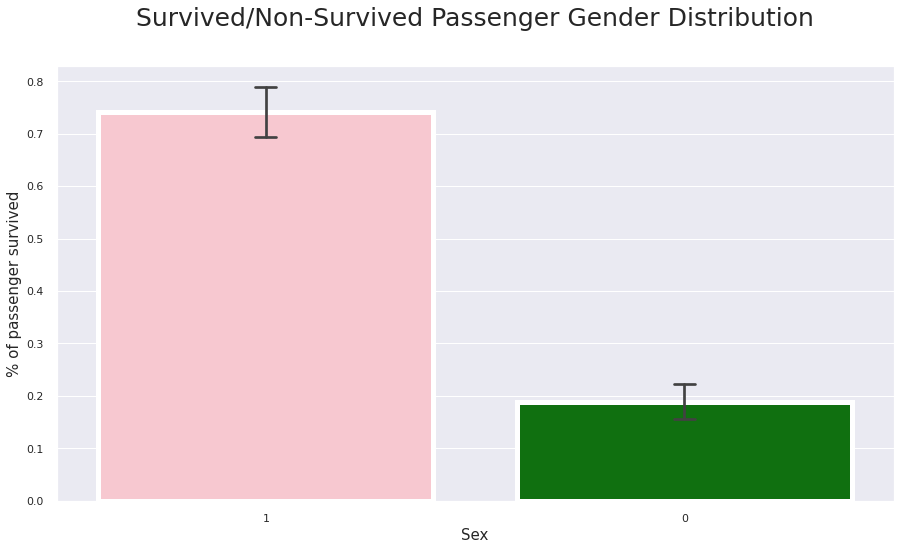

In [157]:
### Data Exploration
## Visualization and Feature Relations

#1 Gender and Survived

pal = {0:"green", 1:"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=df, 
                 palette = pal,
                 linewidth=5,
                 order = [1,0],
                 capsize = .05,)

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);
plt.show()

# This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived

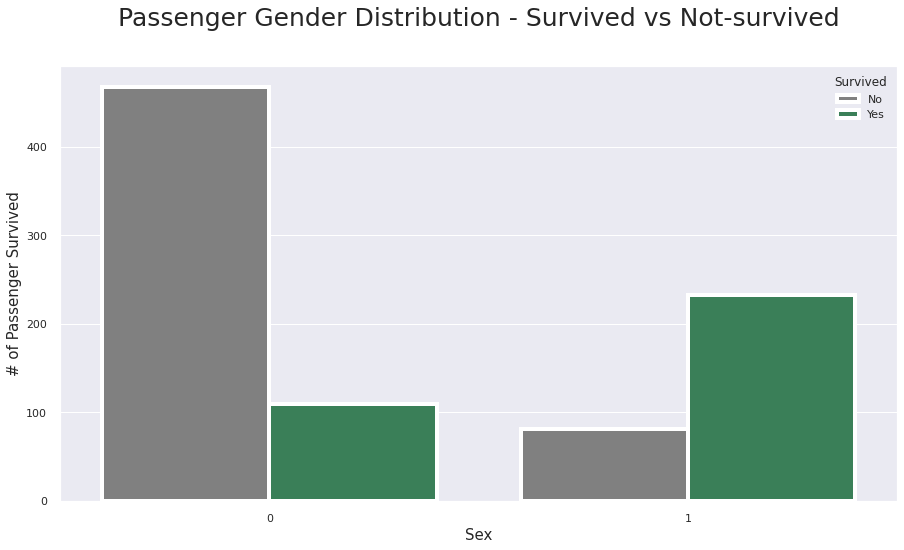

In [158]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = df, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

# This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

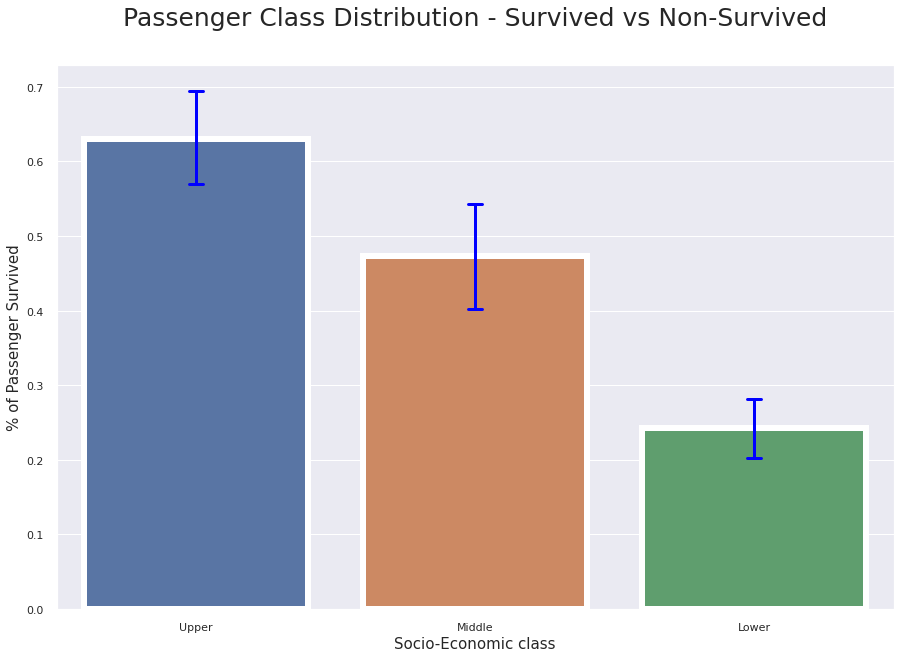

In [159]:
#2 Pclass and Survived

plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=df, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3)

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
val = [0,1,2]
plt.xticks(val, names);

# It looks like ...
# 63% first class passenger survived titanic tragedy, while
# 48% second class and
# only 24% third class passenger survived.

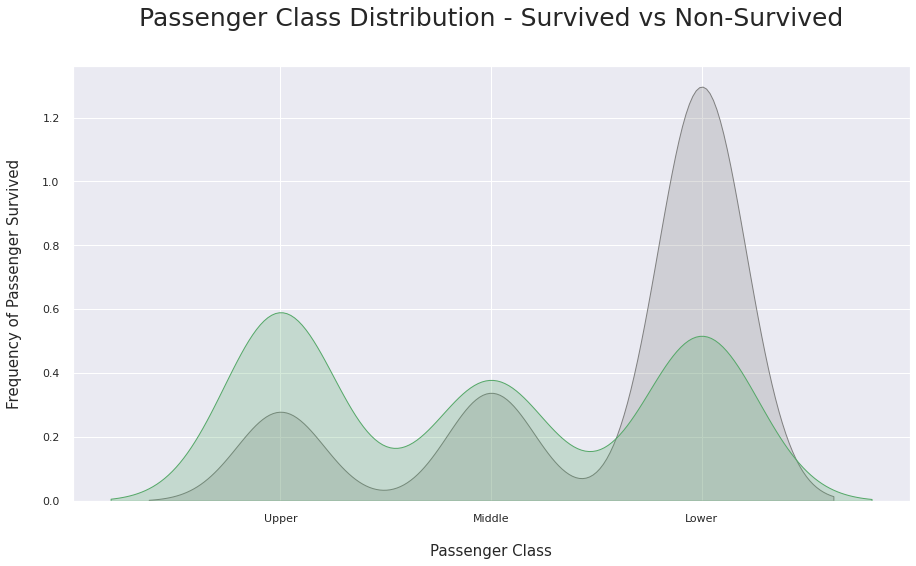

In [160]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)

ax=sns.kdeplot(df.Pclass[df.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')

plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)

## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df.Pclass.unique()), labels);

# The first class passengers had the upper hand during the tragedy.

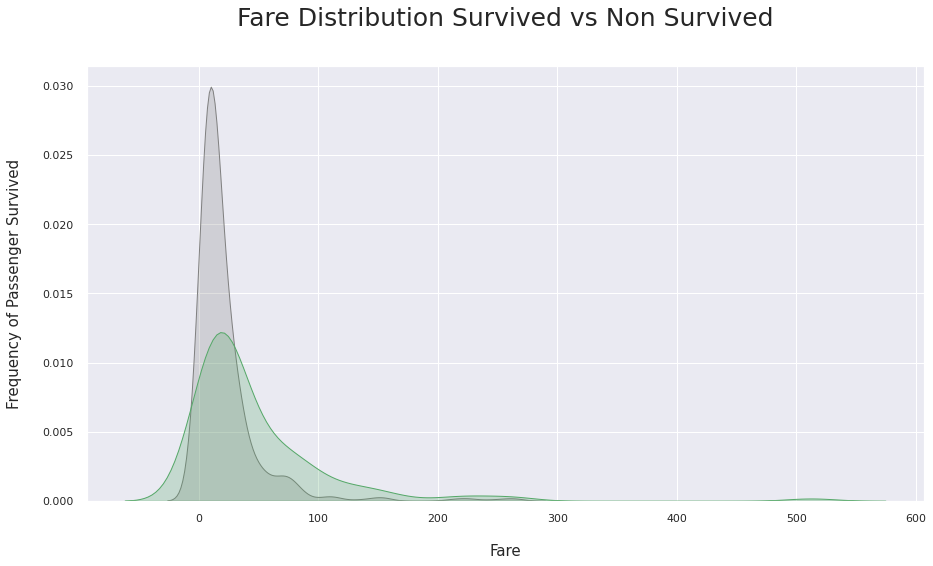

In [161]:
#3 Fare and Survived

# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

# The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive.
# When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment.

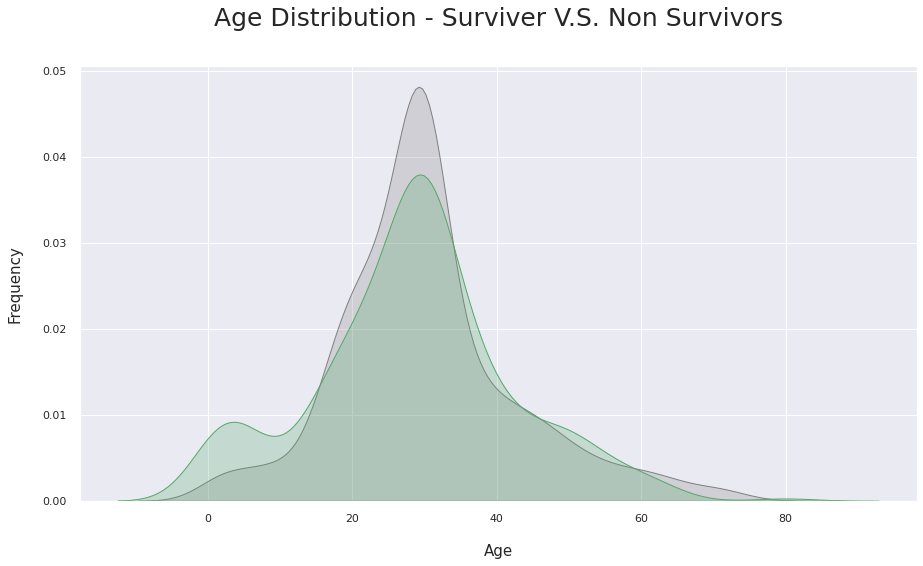

In [162]:
#4 Age and Survived

# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

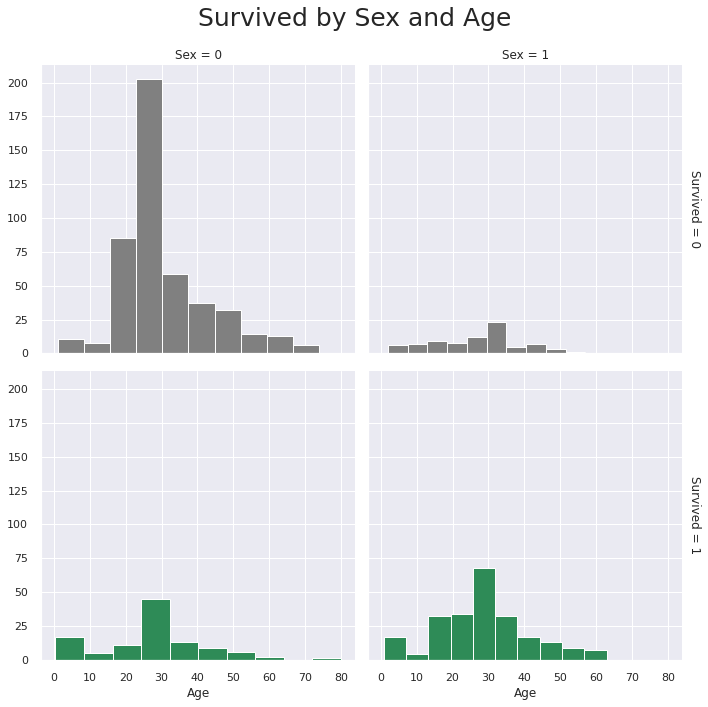

In [163]:
# Combined Feature Relations

pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(df, size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

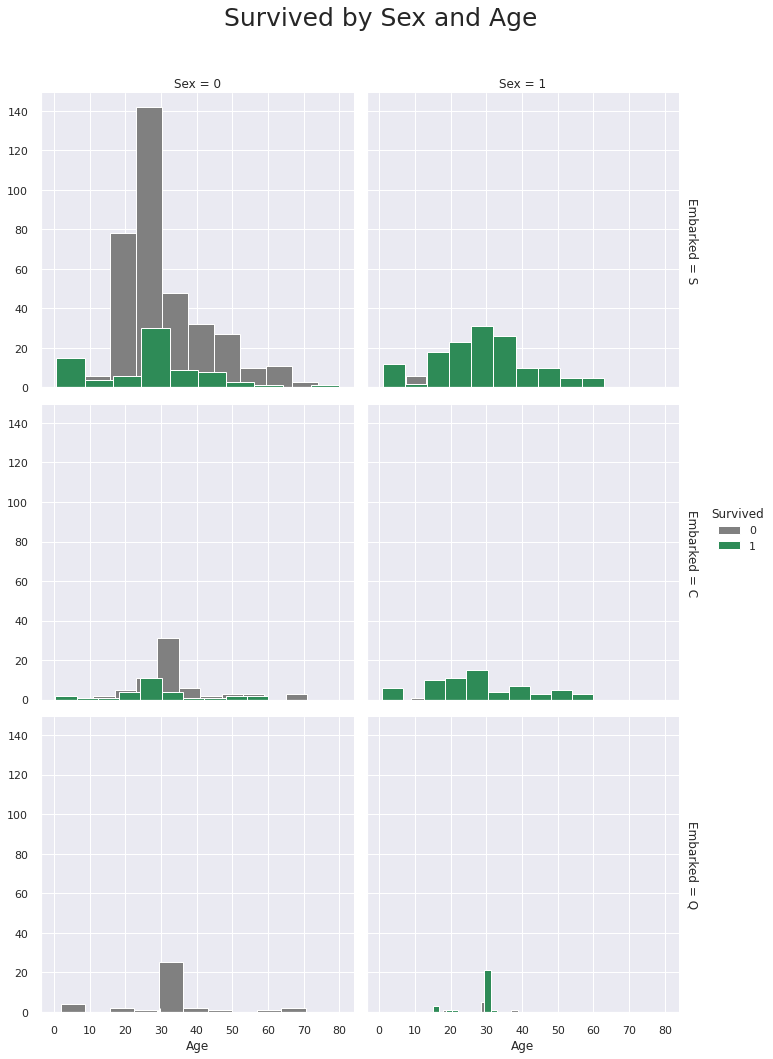

In [164]:
g = sns.FacetGrid(df, size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal)

g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

# The color illustrates passengers survival status(green represents survived, gray represents not survived)
# The column represents Sex(left being male, right stands for female)
# The row represents Embarked(from top to bottom: S, C, Q)


# Most passengers seem to be boarded on Southampton(S).
# More than 60% of the passengers died boarded on Southampton.
# More than 60% of the passengers lived boarded on Cherbourg(C).
# Pretty much every male that boarded on Queenstown(Q) did not survive.
# There were very few females boarded on Queenstown, however, most of them survived.

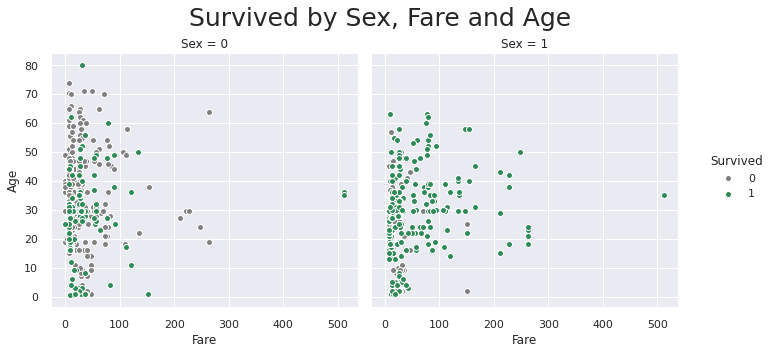

In [165]:
g = sns.FacetGrid(df, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

# The grid above clearly demonstrates the three outliers with Fare of over $500. At this point, I think we are quite confident that these outliers should be deleted.
# Most of the passengers were with in the Fare range of $100.

In [166]:
# Correlation Matrix and Heatmap

pd.DataFrame(abs(df.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.543351
Pclass,0.338481
Fare,0.257307
Alone,0.203367
Age,0.069809
Family_Size,0.016639


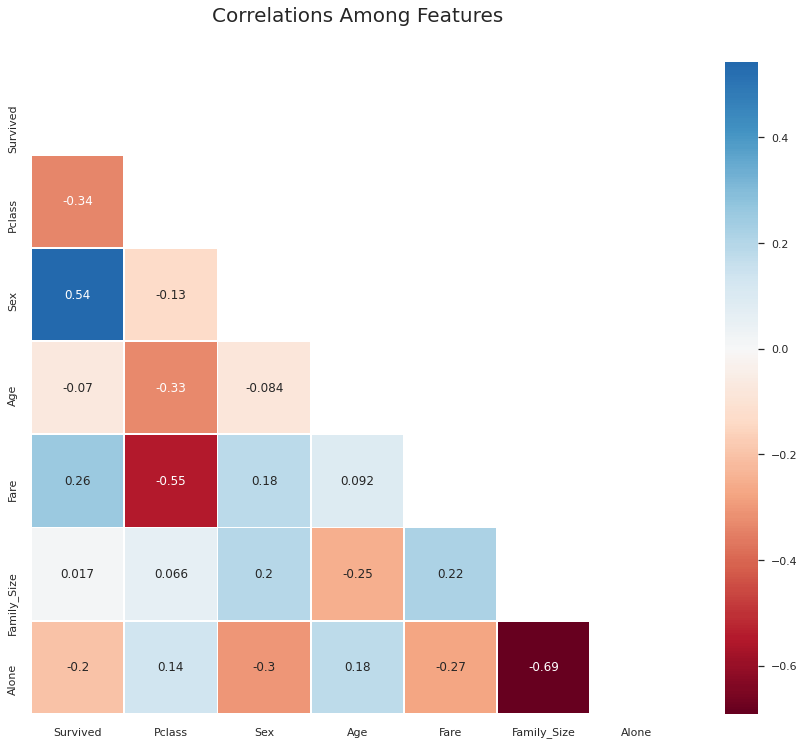

In [167]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [168]:
### Conclusions ###

#1 Female passengers were prioritized over men
#2 People with high class or rich people have higher survival rate than others. The higherarchy might be followed while saving the passengers
#3 Passengers travelling with their family have higher survival rate
#4 Passengers who boarded the ship at Cherbourg, survived more in proportion than the others